In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")  # Replace with your file path if needed

# Optional: Check column names
print("Columns:", df.columns)

# --- Bar Chart by Category ---
if 'Category' in df.columns:
    category_counts = df['Category'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
    plt.title("Ticket Volume by Category")
    plt.xlabel("Category")
    plt.ylabel("Number of Tickets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Category' not found in the dataset.")

# --- Bar Chart by Priority ---
if 'Priority' in df.columns:
    priority_counts = df['Priority'].value_counts()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=priority_counts.index, y=priority_counts.values, palette="magma")
    plt.title("Ticket Volume by Priority")
    plt.xlabel("Priority")
    plt.ylabel("Number of Tickets")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Priority' not found in the dataset.")


Columns: Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
Column 'Category' not found in the dataset.
Column 'Priority' not found in the dataset.


C:\Users\dell\AppData\Local\Temp\ipykernel_32000\3294553906.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Blues_d")


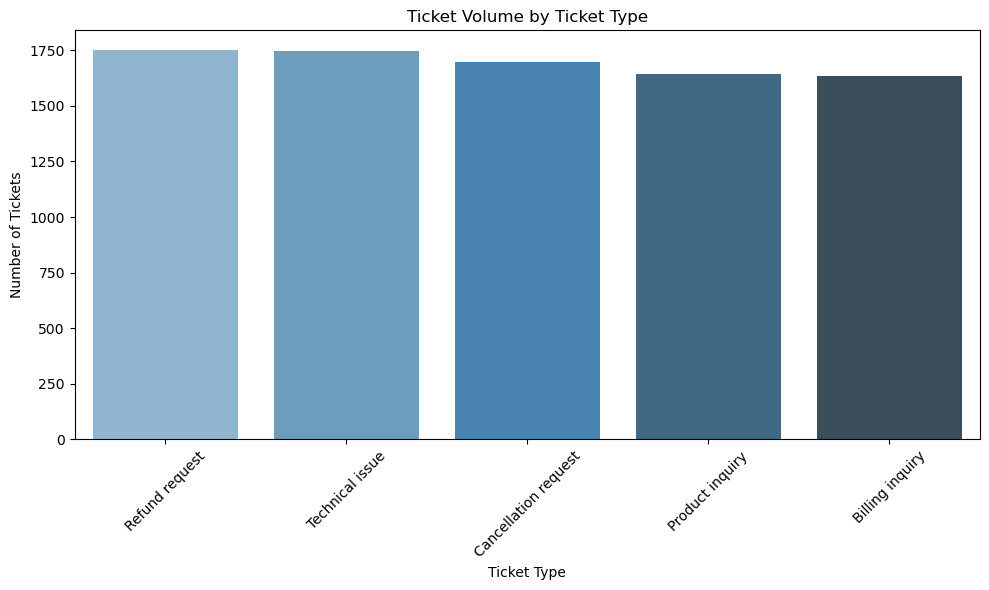

C:\Users\dell\AppData\Local\Temp\ipykernel_32000\3294553906.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=priority_counts.index, y=priority_counts.values, palette="Oranges")


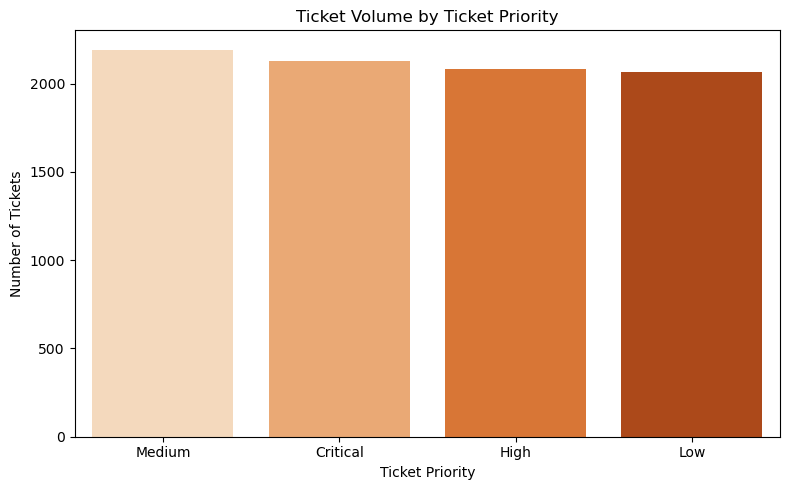

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")  # Adjust the path if needed

# --- Bar Chart: Ticket Volume by Ticket Type ---
if 'Ticket Type' in df.columns:
    type_counts = df['Ticket Type'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=type_counts.index, y=type_counts.values, palette="Blues_d")
    plt.title("Ticket Volume by Ticket Type")
    plt.xlabel("Ticket Type")
    plt.ylabel("Number of Tickets")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Ticket Type' not found in the dataset.")

# --- Bar Chart: Ticket Volume by Ticket Priority ---
if 'Ticket Priority' in df.columns:
    priority_counts = df['Ticket Priority'].value_counts()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=priority_counts.index, y=priority_counts.values, palette="Oranges")
    plt.title("Ticket Volume by Ticket Priority")
    plt.xlabel("Ticket Priority")
    plt.ylabel("Number of Tickets")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Ticket Priority' not found in the dataset.")


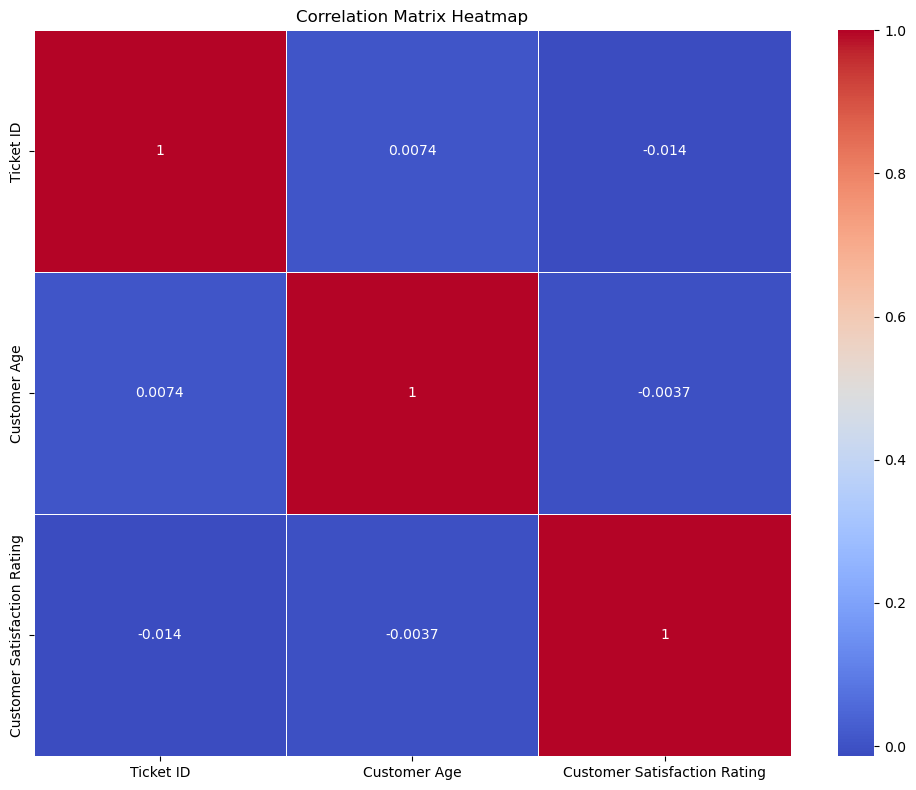

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_32000\4204749123.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Time to Resolution', data=df, palette='Set2')


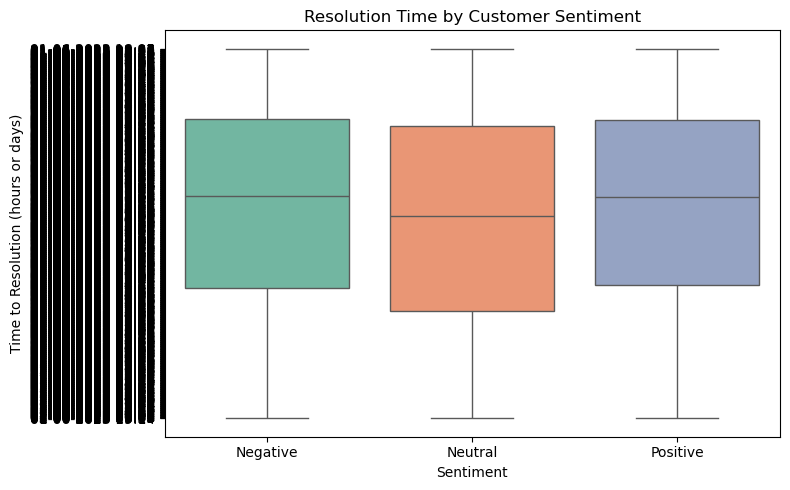

In [4]:
# Create sentiment column from satisfaction rating
def rate_to_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Customer Satisfaction Rating'].apply(rate_to_sentiment)

# Plot boxplot: Time to Resolution vs Sentiment
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='Time to Resolution', data=df, palette='Set2')
plt.title("Resolution Time by Customer Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Time to Resolution (hours or days)")
plt.tight_layout()
plt.show()


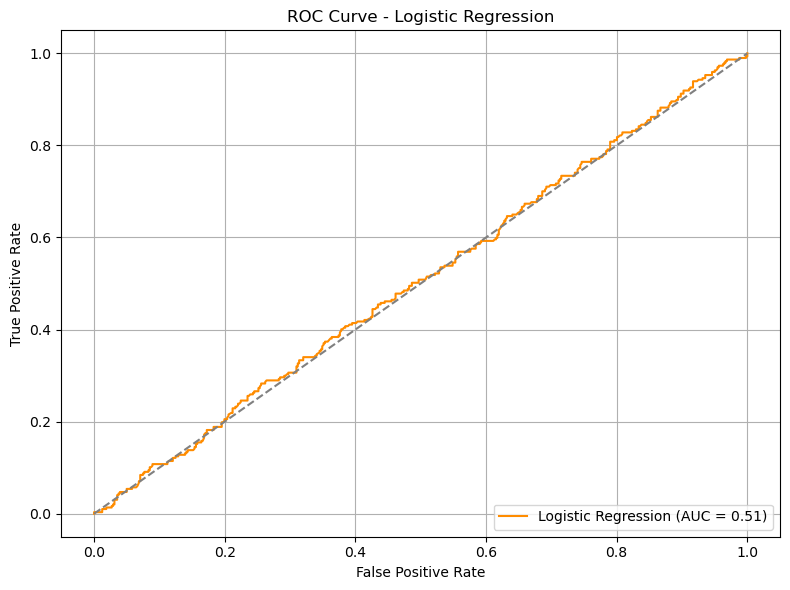

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")

# Convert 'First Response Time' and 'Time to Resolution' to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Drop rows with nulls in datetime columns
df = df.dropna(subset=['First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating'])

# Create new feature: resolution time in hours
df['Resolution Time (Hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

# Create binary target: 1 if rating >= 4
df['Satisfied'] = df['Customer Satisfaction Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Feature and target
X = df[['Resolution Time (Hours)']]
y = df['Satisfied']

# Remove any invalid rows
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Align y with cleaned X
y = y.loc[X.index]

# Scale the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_32000\2905379936.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=feature_names, palette="viridis")


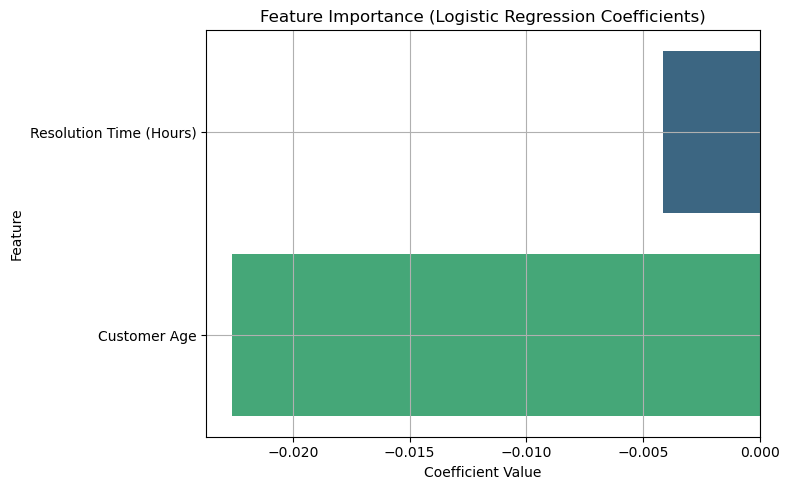

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reuse and clean the data
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df = df.dropna(subset=['First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating'])

# Create target variable
df['Satisfied'] = df['Customer Satisfaction Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Feature: Resolution time in hours
df['Resolution Time (Hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

# Optional: Add more numeric/categorical features
features = ['Resolution Time (Hours)', 'Customer Age']
df = df.dropna(subset=features)

X = df[features]
y = df['Satisfied']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegression()
model.fit(X_scaled, y)

# Plot feature importances
coefficients = model.coef_[0]
feature_names = features

plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients, y=feature_names, palette="viridis")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


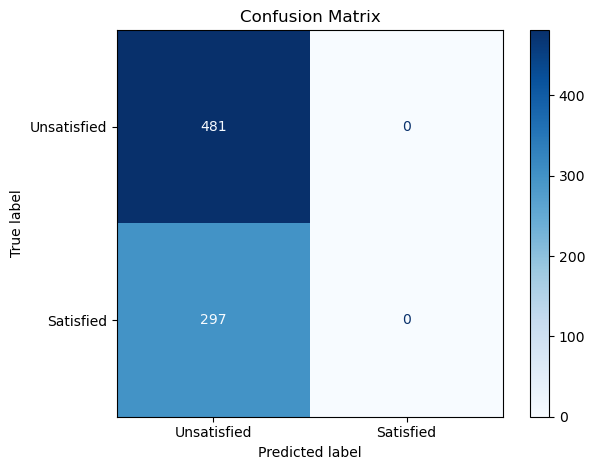

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unsatisfied', 'Satisfied'])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_32000\2148027098.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, palette='magma')


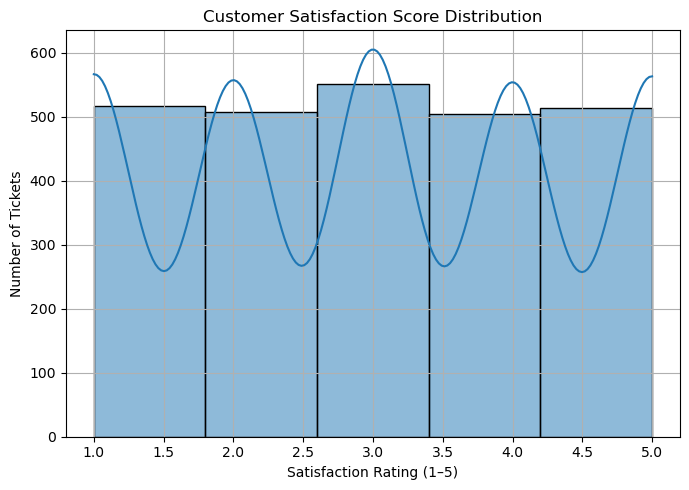

In [8]:
# Plot distribution of Customer Satisfaction Rating
plt.figure(figsize=(7, 5))
sns.histplot(df['Customer Satisfaction Rating'], bins=5, kde=True, palette='magma')
plt.title("Customer Satisfaction Score Distribution")
plt.xlabel("Satisfaction Rating (1–5)")
plt.ylabel("Number of Tickets")
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")

# View missing values
print(df.isnull().sum())

# Fill missing numeric columns with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill missing categorical columns with mode
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Confirm missing values are handled
print(df.isnull().sum())

# Optional: Save cleaned data
df.to_csv("customer_support_tickets_cleaned.csv", index=False)


Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64
Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status     

C:\Users\dell\AppData\Local\Temp\ipykernel_32000\1215408381.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)



ANOVA Table:
                               sum_sq      df         F   PR(>F)
C(Q("Ticket Priority"))     3.399815     3.0  0.572182  0.63331
Residual                 5476.392168  2765.0       NaN      NaN

Pearson Correlation (Age vs Satisfaction): r = -0.004, p = 0.846

Linear Regression Summary:
                                     OLS Regression Results                                   
Dep. Variable:     Q("Customer Satisfaction Rating")   R-squared:                       0.000
Model:                                           OLS   Adj. R-squared:                 -0.000
Method:                                Least Squares   F-statistic:                   0.03789
Date:                               Sun, 15 Jun 2025   Prob (F-statistic):              0.846
Time:                                       14:08:07   Log-Likelihood:                -4874.1
No. Observations:                               2769   AIC:                             9752.
Df Residuals:                           

C:\Users\dell\AppData\Local\Temp\ipykernel_32000\4203617109.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Ticket Priority"] = df_clean["Ticket Priority"].astype("category")
C:\Users\dell\AppData\Local\Temp\ipykernel_32000\4203617109.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Ticket Channel"] = df_clean["Ticket Channel"].astype("category")
C:\Users\dell\AppData\Local\Temp\ipykernel_32000\4203617109.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

[]

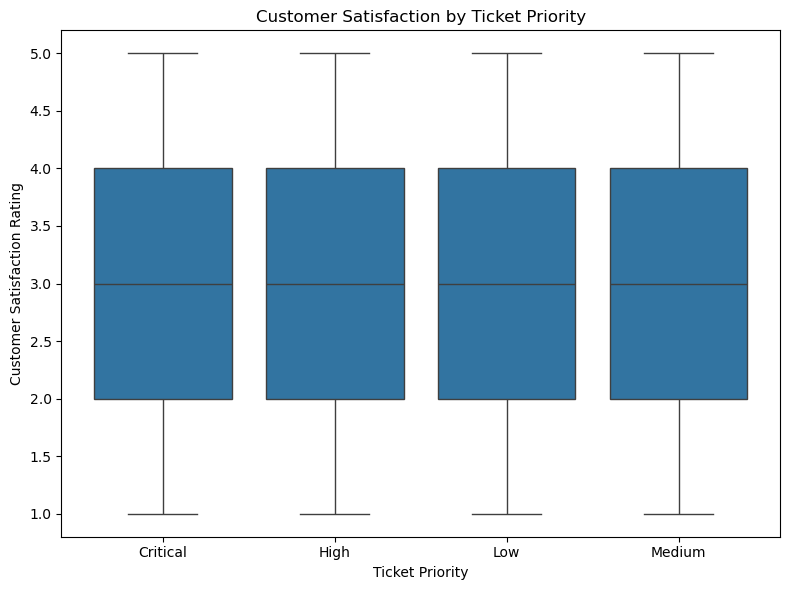

In [12]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")

# Drop rows where satisfaction rating is missing (for analysis)
df_clean = df.dropna(subset=["Customer Satisfaction Rating", "Ticket Priority", "Customer Age"])

# Convert categorical columns to category type
df_clean["Ticket Priority"] = df_clean["Ticket Priority"].astype("category")
df_clean["Ticket Channel"] = df_clean["Ticket Channel"].astype("category")
df_clean["Ticket Type"] = df_clean["Ticket Type"].astype("category")

# -----------------------------
# 1. ANOVA: Satisfaction by Ticket Priority
# -----------------------------
anova_model = smf.ols('Q("Customer Satisfaction Rating") ~ C(Q("Ticket Priority"))', data=df_clean).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("\nANOVA Table:\n", anova_table)

# -----------------------------
# 2. Correlation: Age vs. Satisfaction
# -----------------------------
corr, p_value = stats.pearsonr(df_clean["Customer Age"], df_clean["Customer Satisfaction Rating"])
print(f"\nPearson Correlation (Age vs Satisfaction): r = {corr:.3f}, p = {p_value:.3f}")

# -----------------------------
# 3. Linear Regression: Predict Satisfaction from Age
# -----------------------------
lm_model = smf.ols('Q("Customer Satisfaction Rating") ~ Q("Customer Age")', data=df_clean).fit()
print("\nLinear Regression Summary:\n", lm_model.summary())

# -----------------------------
# 4. Boxplot: Satisfaction by Ticket Priority
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x="Ticket Priority", y="Customer Satisfaction Rating", data=df_clean)
plt.title("Customer Satisfaction by Ticket Priority")
plt.tight_layout()
plt.plot()


In [13]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_csv("C:/Users/dell/Downloads/customer_support_tickets.csv")

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=[
    "Customer Satisfaction Rating", 
    "Customer Age", 
    "Ticket Priority", 
    "Ticket Channel", 
    "Ticket Type"
])

# Convert categorical variables to category dtype
categorical_cols = ["Ticket Priority", "Ticket Channel", "Ticket Type"]
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype("category")

# Build the multiple linear regression model
model = smf.ols(
    formula='Q("Customer Satisfaction Rating") ~ Q("Customer Age") + C(Q("Ticket Priority")) + C(Q("Ticket Channel")) + C(Q("Ticket Type"))',
    data=df_clean
).fit()

# Display model summary
print(model.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Q("Customer Satisfaction Rating")   R-squared:                       0.003
Model:                                           OLS   Adj. R-squared:                 -0.001
Method:                                Least Squares   F-statistic:                    0.7136
Date:                               Sun, 15 Jun 2025   Prob (F-statistic):              0.727
Time:                                       14:43:44   Log-Likelihood:                -4870.1
No. Observations:                               2769   AIC:                             9764.
Df Residuals:                                   2757   BIC:                             9835.
Df Model:                                         11                                         
Covariance Type:                           nonrobust                                         
                                                  coef    st

C:\Users\dell\AppData\Local\Temp\ipykernel_32000\3519268816.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype("category")
C:\Users\dell\AppData\Local\Temp\ipykernel_32000\3519268816.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype("category")
C:\Users\dell\AppData\Local\Temp\ipykernel_32000\3519268816.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co